In [ ]:
!pip install python-interface

In [ ]:
!pip install chart_studio

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
from plotly.offline import iplot, plot

In [ ]:
%load_ext autoreload
%autoreload 2
from IDM import IDM
from CarFactory import CarFactory
from Street import Street, StreetRamp, StreetAuto
from Constants import *

## Experiment 0: Visualization of two road


In [ ]:
# car_prob and auto_prob are independent Probability
#prob_auto, prob_car = .5, .5
prob_auto, prob_car = 0.0, 0.8 
num_lane = 2
#road_length = 500 # 5 km
road_length = 112.654 # 0.7mile
flow_in = 4 # vehicle per second

In [ ]:
cf = CarFactory(prob_auto, prob_car)
road = Street(num_lane, road_length, cf)
for i in range(1000):
    road.update(flow_in)
    if i % 100 == 0:
        road.report()
        print("#Vehicle wait to join:" , road.vehicle_wait)

-----------------------------------------------------------------
time =  0.50
total vehicle:    1, average speed 10.85, flow in 0.00 vehicle/s, flow out 0.00 vehicle/s
	 num cars in each lane [0. 1.]
-----------------------------------------------------------------
#Vehicle wait to join: 1.0
-----------------------------------------------------------------
time = 50.50
total vehicle:   20, average speed 3.11, flow in 0.00 vehicle/s, flow out 0.00 vehicle/s
	 num cars in each lane [10. 10.]
-----------------------------------------------------------------
#Vehicle wait to join: 1.0
-----------------------------------------------------------------
time = 100.50
total vehicle:   22, average speed 3.10, flow in 0.58 vehicle/s, flow out 0.56 vehicle/s
	 num cars in each lane [10. 12.]
-----------------------------------------------------------------
#Vehicle wait to join: 1.0
-----------------------------------------------------------------
time = 150.50
total vehicle:   20, average speed 

In [ ]:
#Same condition, but 50% auto
prob_auto, prob_car = .5, .8
#prob_auto, prob_car = 0.0, 1.0 
num_lane = 2
#road_length = 500 # 5 km
road_length = 112.654 # 0.7mile
flow_in = 2 # vehicle per second

In [ ]:
cf = CarFactory(prob_auto, prob_car)
road_polite = Street(num_lane, road_length, cf)
for i in range(1000):
    road_polite.update(flow_in)
    if i % 100 == 0:
        road_polite.report()
        print("#Vehicle wait to join", road_polite.vehicle_wait)

-----------------------------------------------------------------
time =  0.50
total vehicle:    0, average speed  nan, flow in 0.00 vehicle/s, flow out 0.00 vehicle/s
	 num cars in each lane [0. 0.]
-----------------------------------------------------------------
#Vehicle wait to join 1.0
-----------------------------------------------------------------
time = 50.50
total vehicle:   15, average speed 5.06, flow in 0.00 vehicle/s, flow out 0.00 vehicle/s
	 num cars in each lane [7. 8.]
-----------------------------------------------------------------
#Vehicle wait to join 1.0


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



-----------------------------------------------------------------
time = 100.50
total vehicle:   16, average speed 5.87, flow in 0.82 vehicle/s, flow out 0.82 vehicle/s
	 num cars in each lane [9. 7.]
-----------------------------------------------------------------
#Vehicle wait to join 1.0
-----------------------------------------------------------------
time = 150.50
total vehicle:   18, average speed 6.63, flow in 0.82 vehicle/s, flow out 0.82 vehicle/s
	 num cars in each lane [ 8. 10.]
-----------------------------------------------------------------
#Vehicle wait to join 1.0
-----------------------------------------------------------------
time = 200.50
total vehicle:   18, average speed 5.44, flow in 0.76 vehicle/s, flow out 0.78 vehicle/s
	 num cars in each lane [10.  8.]
-----------------------------------------------------------------
#Vehicle wait to join 1.0
-----------------------------------------------------------------
time = 250.50
total vehicle:   11, average speed 4.

In [ ]:
import plotly.graph_objs as go
color_map = dict()
color_map['0'] = 'rgb(255, 0, 0)' # Red
color_map['1'] = 'rgb(255, 174, 0)' # Yellow(Orange?)
color_map['2'] = 'rgb(0, 255, 0)' # Green
color_map['3'] = 'rgb(0, 204, 204)' # Light -Blue
#color_map['4'] = 'rgb(0, 0, 255)' # Blue
i = 0 # color map
def generate_fig(road):
    '''
    Input:
        street = list of "Moveable" --> Car or CarHuman
    Return:
        plolty fig
    '''
    lane_width = 5 # 5 m
    traces = []
    pre_car_back1 = 10000 
    pre_car_back2 = 10000 #front car 
    for car in road.street:
        #print(int(car.vel/4))
        #print(car.pos + car.length)
        if car.lane == 0: 
          if car.pos + car.length >= pre_car_back1: 
            print("collaps")
            continue #avoid overlap in visualization
        if car.lane == 1: 
          if car.pos + car.length >= pre_car_back2: 
            print("collaps")
            continue #avoid overlap in visualization
        #print(car.vel)
        if car.vel >8.3:
          print("The speed higher than 30km/h")
          i = 3
        if car.vel > 5.5 and car.vel <=8.3:
          print("The speed higher than 20km/h ,lower than 30km/h")
          i =2
        if car.vel > 2.7 and car.vel <= 5.5:
          print("The speed higher than 10km/h ,lower than 20km/h")
          i =1
        if car.vel <=2.7:
          print("Traffic jam, speed lower than 10km/h")
          i =0 


        trace = go.Scatter(x = [car.pos, car.pos+ car.length],
                           y = [car.lane + 1, car.lane + 1],
                           mode = 'lines',
                           # the color is based on the velocity m/s of the car 
                           marker = dict( color = color_map['{}'.format(i)] 
                                           ))
        traces.append(trace)
        if car.lane == 0:  pre_car_back1 = car.pos 
        if car.lane == 1: pre_car_back2 = car.pos

    layout = go.Layout(title='traffic simulation at time {:6.1f}s with P(abnormal drivers) = 0.5'.format(road.time),
                       xaxis=dict(title='distance (meters)'),
                       yaxis=dict(title='lane number',
                                    showgrid=True,
                                    zeroline=True,
                                    showline=False,
                                    showticklabels=True,
                                   tickmode = 'linear', tick0 = 1, dtick = 1),
                       showlegend=False)
    return go.Figure(data= traces, layout=layout)

In [ ]:
fig1 = generate_fig(road)
fig2 = generate_fig(road_polite)  # add 0.5 polite driver

The speed higher than 10km/h ,lower than 20km/h
collaps
The speed higher than 10km/h ,lower than 20km/h
The speed higher than 10km/h ,lower than 20km/h
The speed higher than 10km/h ,lower than 20km/h
The speed higher than 10km/h ,lower than 20km/h
The speed higher than 10km/h ,lower than 20km/h
The speed higher than 10km/h ,lower than 20km/h
The speed higher than 10km/h ,lower than 20km/h
The speed higher than 10km/h ,lower than 20km/h
collaps
The speed higher than 10km/h ,lower than 20km/h
The speed higher than 10km/h ,lower than 20km/h
The speed higher than 10km/h ,lower than 20km/h
The speed higher than 10km/h ,lower than 20km/h
The speed higher than 10km/h ,lower than 20km/h
The speed higher than 10km/h ,lower than 20km/h
The speed higher than 10km/h ,lower than 20km/h
The speed higher than 10km/h ,lower than 20km/h
The speed higher than 10km/h ,lower than 20km/h
The speed higher than 10km/h ,lower than 20km/h
The speed higher than 20km/h ,lower than 30km/h
collaps
The speed higher

In [ ]:
import plotly.offline as py1
py1.iplot(fig1)

In [ ]:
py1.iplot(fig2)

  ## Experiment 1: Diffferent Initial Speed
  

In [ ]:
# car_prob and auto_prob are independent Probability
# only contain car, no truck
#
#prob_auto, prob_car = .5, .5
prob_auto, prob_car = 0.0, 0.8
num_lane = 2
#road_length = 500 # 5 km
road_length = 112.654 # 0.7mile
flow_in = 4 # vehicle per second
dt = 0.5

In [ ]:
from CarFactory_v import CarFactory_v as CarFactory

def calculation_v_d_f(num_lane,v0,prob_auto):
    # return avg v , d, f
   # car_prob and auto_prob are independent Probability
    prob_auto, prob_car = prob_auto, 0.8
    flow_in = 2
    # road_length = 1310
    road_length = 112.654 #0.7mile

    dt = 0.5
    #prob_ramp = 0.25
    cf = CarFactory(prob_auto, prob_car, v0_car = v0)
    road = Street(num_lane, road_length, cf,  dt=dt)
    speed_avg = []
    flow_avg = []
    density_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        numofcar = 0
        for car in road.street:
          numofcar += 1 #Get the number of car 
        #print(numofcar)

        speed = np.mean([car.vel for car in road.street]) * 3.6 #km/s
        density = numofcar / (road_length / 100) # #v/km
        flow = speed * density # #v/s
        if np.isnan(speed): 
          speed = 0
        if np.isnan(density): 
          density = 0
        if np.isnan(flow): 
          flow = 0
        speed_avg.append(speed)
        flow_avg.append(flow)
        density_avg.append(density)
       
        if i % 500 == 0:
            road.report()
#            print(speed_avg)
#         if i % 400 == 0:
#             fig = generate_fig(road)
#             plot(fig, image='png', filename='image{:04d}.html'.format(int(i/400)), image_filename='image{:04d}'.format(int(i/400)))
    return np.mean(speed_avg),np.mean(density_avg),np.mean(flow_avg)

In [ ]:
# Ratio of Polite driver to Density, flow
np.random.seed(2)
v0s = np.arange(10, 40.1, 2) #kmh
performance_density_0 = []
performance_flow_0 = []
performance_speed_0 = []

performance_density_025 = []
performance_flow_025 = []
performance_speed_025 = []

performance_density_05 = []
performance_flow_05 = []
performance_speed_05 = []

performance_density_075 = []
performance_flow_075 = []
performance_speed_075 = []

performance_density_1 = []
performance_flow_1 = []
performance_speed_1 = []

performance = []
for v0 in v0s:
    print("############################################")
    print("initial speed = {:2.2f}".format(v0))
    print("############################################")

    speed0, density0, flow0 = calculation_v_d_f(2,v0,0) #abnormal
    speed025, density025, flow025 = calculation_v_d_f(2,v0,0.25)
    speed05, density05, flow05 = calculation_v_d_f(2,v0,0.5)
    speed075, density075, flow075 = calculation_v_d_f(2,v0,0.75)
    speed1, density1, flow1 = calculation_v_d_f(2,v0,1) #normal


    performance_density_0.append(density0)
    performance_density_025.append(density025)
    performance_density_05.append(density05)
    performance_density_075.append(density075)
    performance_density_1.append(density1)

    performance_flow_0.append(flow0)
    performance_flow_025.append(flow025)
    performance_flow_05.append(flow05)
    performance_flow_075.append(flow075)
    performance_flow_1.append(flow1)

    performance_speed_0.append(speed0)
    performance_speed_025.append(speed025)
    performance_speed_05.append(speed05)
    performance_speed_075.append(speed075)
    performance_speed_1.append(speed1)




############################################
initial speed = 10.00
############################################


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



-----------------------------------------------------------------
time = 250.00
total vehicle:   19, average speed 2.39, flow in 1.66 vehicle/s, flow out 1.28 vehicle/s
	 num cars in each lane [ 9. 10.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 250.00
total vehicle:   19, average speed 2.55, flow in 1.74 vehicle/s, flow out 1.38 vehicle/s
	 num cars in each lane [ 9. 10.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 250.00
total vehicle:   19, average speed 2.71, flow in 1.78 vehicle/s, flow out 1.46 vehicle/s
	 num cars in each lane [10.  9.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 250.00
total vehicle:   18, average speed 2.60, flow in 1.86 vehicle/s, flow out 1.48 vehicle/s
	 num cars in each lane 

In [ ]:
from CarFactory_v import CarFactory_v as CarFactory

def speed_v(num_lane,v0):
   # car_prob and auto_prob are independent Probability
    prob_auto, prob_car = 0, 0.8
    flow_in = 2
    # road_length = 1310
    road_length = 112.654 #0.7mile

    dt = 0.5
    #prob_ramp = 0.25
    cf = CarFactory(prob_auto, prob_car, v0_car = v0)
    road = Street(num_lane, road_length, cf,  dt=dt)
    speed_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        speed = np.mean([car.vel for car in road.street])
        if np.isnan(speed): 
          speed = 0
        speed_avg.append(speed)
        if i % 500 == 0:
            road.report()
#            print(speed_avg)
#         if i % 400 == 0:
#             fig = generate_fig(road)
#             plot(fig, image='png', filename='image{:04d}.html'.format(int(i/400)), image_filename='image{:04d}'.format(int(i/400)))
    return np.mean(speed_avg) *3.6

In [ ]:
#from CarFactory_v import CarFactory 

def speed_v_auto(num_lane,v0,prob_au):
   # car_prob and auto_prob are independent Probability
    prob_auto, prob_car = prob_au, 0.8
    print("prob_auto=", prob_auto)
    flow_in = 10
    # road_length = 1310
    road_length = 112.654 #0.7mile

    dt = 0.5
    #prob_ramp = 0.25
    cf = CarFactory(prob_auto, prob_car, v0_car = v0)
    road = Street(num_lane, road_length, cf,  dt=dt)
    speed_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        speed = np.mean([car.vel for car in road.street])
        if np.isnan(speed): 
          speed = 0
        speed_avg.append(speed)
        if i % 500 == 0:
            road.report()
#            print(speed_avg)
#         if i % 400 == 0:
#             fig = generate_fig(road)
#             plot(fig, image='png', filename='image{:04d}.html'.format(int(i/400)), image_filename='image{:04d}'.format(int(i/400)))
    return np.mean(speed_avg) *3.6

In [ ]:
# only human car
np.random.seed(2)
v0s = np.arange(10, 40.1, 2) #kmh
    
performance = []
for v0 in v0s:
    print("############################################")
    print("initial speed = {:2.2f}".format(v0))
    print("############################################")
    performance.append(speed_v(2,v0))


############################################
initial speed = 10.00
############################################


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



-----------------------------------------------------------------
time = 250.00
total vehicle:   19, average speed 2.39, flow in 1.66 vehicle/s, flow out 1.28 vehicle/s
	 num cars in each lane [ 9. 10.]
-----------------------------------------------------------------
############################################
initial speed = 12.00
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:   19, average speed 2.57, flow in 1.78 vehicle/s, flow out 1.42 vehicle/s
	 num cars in each lane [ 9. 10.]
-----------------------------------------------------------------
############################################
initial speed = 14.00
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:   19, average speed 2.89, flow in 1.90 vehicle/s, flow out 1.52 vehicle/s
	 num cars in each lane [10.  9.]
-----------------------------------

In [ ]:
# only human car
np.random.seed(2)
v0s = np.arange(10, 40.1, 2) #kmh
    
performance_05 = []
performance_075 = []
performance_025 = []
performance_01 = []
for v0 in v0s:
    print("############################################")
    print("initial speed = {:2.2f}".format(v0))
    print("############################################")
    performance_05.append(speed_v_auto(2,v0,0.5))
    performance_075.append(speed_v_auto(2,v0,0.75))
    performance_025.append(speed_v_auto(2,v0,0.25))
    performance_01.append(speed_v_auto(2,v0,1.0))


############################################
initial speed = 10.00
############################################
prob_auto= 0.5
-----------------------------------------------------------------
time = 250.00
total vehicle:   21, average speed 2.52, flow in 2.00 vehicle/s, flow out 1.56 vehicle/s
	 num cars in each lane [11. 10.]
-----------------------------------------------------------------
prob_auto= 0.75
-----------------------------------------------------------------
time = 250.00
total vehicle:   21, average speed 2.78, flow in 2.04 vehicle/s, flow out 1.64 vehicle/s
	 num cars in each lane [10. 11.]
-----------------------------------------------------------------
prob_auto= 0.25
-----------------------------------------------------------------
time = 250.00
total vehicle:   20, average speed 2.38, flow in 1.80 vehicle/s, flow out 1.40 vehicle/s
	 num cars in each lane [10. 10.]
-----------------------------------------------------------------
prob_auto= 1.0
-------------------

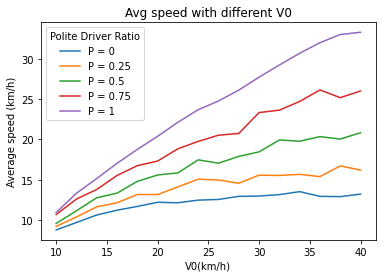

In [ ]:
plt.plot(v0s, performance_speed_0, label='P = 0')
plt.plot(v0s, performance_speed_025, label='P = 0.25')
plt.plot(v0s, performance_speed_05, label='P = 0.5')
plt.plot(v0s, performance_speed_075, label='P = 0.75')
plt.plot(v0s, performance_speed_1, label='P = 1')
plt.title('Avg speed with different V0')
plt.xlabel('V0(km/h)')
plt.ylabel('Average speed (km/h)')
plt.legend(title = "Polite Driver Ratio")

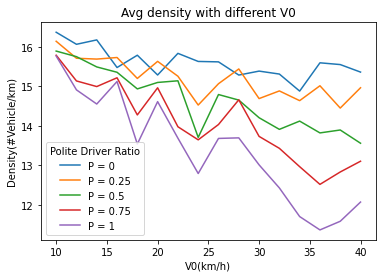

In [ ]:
plt.plot(v0s, performance_density_0, label='P = 0')
plt.plot(v0s, performance_density_025, label='P = 0.25')
plt.plot(v0s, performance_density_05, label='P = 0.5')
plt.plot(v0s, performance_density_075, label='P = 0.75')
plt.plot(v0s, performance_density_1, label='P = 1')
plt.title('Avg density with different V0')
plt.xlabel('V0(km/h)')
plt.ylabel('Density(#Vehicle/km)')
plt.legend(title = "Polite Driver Ratio")

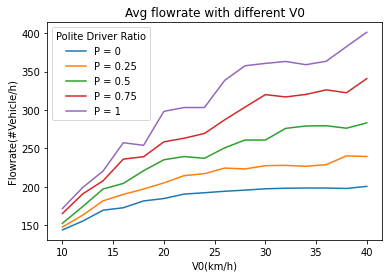

In [ ]:
plt.plot(v0s, performance_flow_0, label='P = 0')
plt.plot(v0s, performance_flow_025, label='P = 0.25')
plt.plot(v0s, performance_flow_05, label='P = 0.5')
plt.plot(v0s, performance_flow_075, label='P = 0.75')
plt.plot(v0s, performance_flow_1, label='P = 1')
plt.title('Avg flowrate with different V0')
plt.xlabel('V0(km/h)')
plt.ylabel('Flowrate(#Vehicle/h)')
plt.legend(title = "Polite Driver Ratio")

## Experiment 2: Relationship: Auto car ratio v.s. Average speed

change the ratio of AutoCar, and look for the average speed change

* car_prob = 0.8

* speed_limit = 25 MPH = 40.23 KMH

* flow_in = 1.31 v/s = 4725 v/h **Need Clarification**

* flow_in_ramp = 0.44 v/s = 1575 v/h

* flow_in_total = 1.75 v/s = 6300 v/h

* mile_post_dist = 0.821 mile = 1.31 km

In [ ]:
# Use Street()
def speed_auto(auto, num_lane):
   # car_prob and auto_prob are independent Probability
    prob_auto, prob_car = auto, 0.6
    flow_in = 2
    # road_length = 1310
    road_length = 112.654 #0.7mile

    dt = 0.5
    #prob_ramp = 0.25

    cf = CarFactory(prob_auto, prob_car)
    road = Street(num_lane, road_length, cf,  dt=dt)
    speed_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        speed = np.mean([car.vel for car in road.street])
        if np.isnan(speed): 
          speed = 0
        speed_avg.append(speed)
        if i % 500 == 0:
            road.report()
            print(speed_avg)
#         if i % 400 == 0:
#             fig = generate_fig(road)
#             plot(fig, image='png', filename='image{:04d}.html'.format(int(i/400)), image_filename='image{:04d}'.format(int(i/400)))
    return np.mean(speed_avg) * 3.6

In [ ]:
auto_ratio = np.arange(0, 1.01, 0.1)
performance3 = []
num_lane = 2
for auto in auto_ratio:
    print("############################################")
    print("auto car ratio = {:2.2f}".format(auto))
    print("############################################")
    performance3.append(speed_auto(auto, num_lane))


############################################
auto car ratio = 0.00
############################################


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



-----------------------------------------------------------------
time = 250.00
total vehicle:   19, average speed 3.52, flow in 2.24 vehicle/s, flow out 1.86 vehicle/s
	 num cars in each lane [ 9. 10.]
-----------------------------------------------------------------
[0, 8.215041042413386, 9.531997020781782, 9.531997020781782, 7.570719084506276, 6.947741903349697, 6.947741903349697, 6.947741903349697, 6.947741903349697, 6.947741903349697, 6.297282836537416, 5.867793767957571, 5.867793767957571, 5.867793767957571, 5.867793767957571, 5.867793767957571, 5.867793767957571, 5.479660190713434, 5.363959661675663, 5.363959661675663, 5.363959661675663, 5.363959661675663, 5.363959661675663, 4.58038918489359, 4.526191265560737, 4.526191265560737, 4.526191265560737, 4.526191265560737, 4.6272849066922435, 4.032174653159992, 4.032174653159992, 4.032174653159992, 3.9335200679936357, 3.9335200679936357, 3.9335200679936357, 3.9335200679936357, 3.9335200679936357, 3.9335200679936357, 3.9335200679936357

No handles with labels found to put in legend.


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[13.304070465360793, 14.633088930757179, 15.35459125306141, 16.4318204416447, 17.82563147608355, 19.885156713771224, 22.495372860017955, 23.82110270917951, 26.891929387362232, 29.03792527228166, 31.738994900163437]


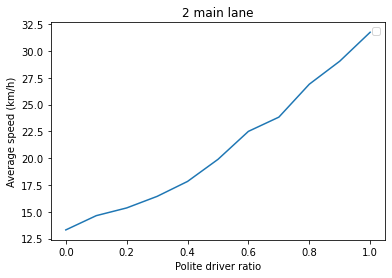

In [ ]:
print(auto_ratio)
print(performance3)
plt.plot(auto_ratio, performance3)
#plt.plot(auto_ratio, performance3_dedicate, label='with dedicate lanes')
plt.title('2 main lane')
plt.xlabel('Polite driver ratio')
plt.ylabel('Average speed (km/h)')
plt.legend()

In [ ]:
# Use StreetRamp
'''
    Let lane 0 be the on ramp, where the road is closed from 1/3 of the roadlength.
'''

def speed_auto(auto, num_lane):
    prob_auto, prob_car = auto, 0.8
    flow_in = 1.31
    # road_length = 1310
    road_length = 112.654 #0.7mile

    dt = 0.5
    prob_ramp = 0.5

    cf = CarFactory(prob_auto, prob_car)
    road = StreetRamp(num_lane, road_length, cf, prob_ramp, dt=dt)
    speed_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        speed_avg.append(np.mean([car.vel for car in road.street]))
        if i % 500 == 0:
            road.report()
#         if i % 400 == 0:
#             fig = generate_fig(road)
#             plot(fig, image='png', filename='image{:04d}.html'.format(int(i/400)), image_filename='image{:04d}'.format(int(i/400)))
    return np.mean(speed_avg)*3.6

In [ ]:
auto_ratio = np.arange(0, 1.01, 0.1)
performance3_ramp = []
num_lane = 1
for auto in auto_ratio:
    print("############################################")
    print("auto car ratio = {:2.2f}".format(auto))
    print("############################################")
    performance3_ramp.append(speed_auto(auto, num_lane))


############################################
auto car ratio = 0.00
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:   20, average speed 3.05, flow in 2.32 vehicle/s, flow out 1.92 vehicle/s
	 num cars in each lane [10. 10.]
-----------------------------------------------------------------
############################################
auto car ratio = 0.10
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:   20, average speed 2.98, flow in 2.52 vehicle/s, flow out 2.16 vehicle/s
	 num cars in each lane [ 9. 11.]
-----------------------------------------------------------------
############################################
auto car ratio = 0.20
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:   21, average speed 3.35, flow 

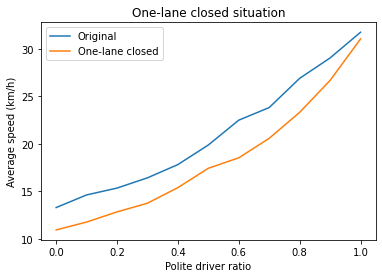

In [ ]:

plt.plot(auto_ratio, performance3, label='Original')
plt.plot(auto_ratio, performance3_ramp, label='One-lane closed')
plt.title('One-lane closed situation')
plt.xlabel('Polite driver ratio')
plt.ylabel('Average speed (km/h)')
plt.legend()

In [ ]:
# Experiment Close Position 


## Experiment 3 Average Speed VS Number of Line

In [ ]:
def speed_human_lane(lane,flow_in,prob_auto):
    prob_auto, prob_car = prob_auto, 0.8
    #flow_in = 30
    #road_length = 1310
    road_length = 112.654 #0.7mile
    dt = 0.5
    #prob_ramp = 0.25
    num_lane = lane

    cf = CarFactory(prob_auto, prob_car)
    #road = StreetRamp(num_lane, road_length, cf, prob_ramp, dt=dt)
    road = Street(num_lane, road_length, cf, dt=dt)
    speed_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        
        speed = np.mean([car.vel for car in road.street])
        if np.isnan(speed): 
          speed = 0
        speed_avg.append(speed)

        #speed_avg.append(np.mean([car.vel for car in road.street]))

        if i % 200 == 0:
            road.report()
    return np.mean(speed_avg) * 3.6

In [ ]:
#Experiment: Abnormal Driver
lanes = [2,3,4,5,6,7,8]
#flow_ins = np.arange(5, 20, 5)
performance_lane5 = []
performance_lane10 = []
performance_lane15 = []
performance_lane20 = []

for lane in lanes:
      print("############################################")
      print("auto car ratio = {:2d}".format(lane))
      print("############################################")
      #print(speed_human_lane(lane))
      performance_lane5.append(speed_human_lane(lane,5,0))
      performance_lane10.append(speed_human_lane(lane,10,0))
      performance_lane15.append(speed_human_lane(lane,15,0))
      performance_lane20.append(speed_human_lane(lane,20,0))


############################################
auto car ratio =  2
############################################
-----------------------------------------------------------------
time = 100.00
total vehicle:   21, average speed 3.13, flow in 1.18 vehicle/s, flow out 0.76 vehicle/s
	 num cars in each lane [10. 11.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 200.00
total vehicle:   20, average speed 3.14, flow in 1.14 vehicle/s, flow out 1.16 vehicle/s
	 num cars in each lane [10. 10.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 300.00
total vehicle:   21, average speed 3.14, flow in 1.14 vehicle/s, flow out 1.12 vehicle/s
	 num cars in each lane [11. 10.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 400.00
tot

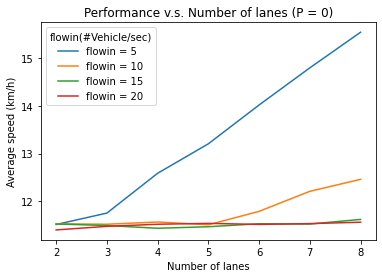

In [ ]:
#Plot ALL Abnormal Driver
plt.plot(lanes, performance_lane5,label = 'flowin = 5')
plt.plot(lanes, performance_lane10,label = 'flowin = 10')
plt.plot(lanes, performance_lane15,label = 'flowin = 15')
plt.plot(lanes, performance_lane20,label = 'flowin = 20')
plt.title('Performance v.s. Number of lanes (P = 0)')
plt.xlabel('Number of lanes')
plt.ylabel('Average speed (km/h)')
#plt.axhline(y=25, color='r', linestyle='--')
plt.legend(title=('flowin(#Vehicle/sec)'))
plt.show()

In [ ]:
#Experiment: HALF Abnormal Driver
lanes = [2,3,4,5,6,7,8]
#flow_ins = np.arange(5, 20, 5)
performance_lane5 = []
performance_lane10 = []
performance_lane15 = []
performance_lane20 = []

for lane in lanes:
      print("############################################")
      print("auto car ratio = {:2d}".format(lane))
      print("############################################")
      #print(speed_human_lane(lane))
      performance_lane5.append(speed_human_lane(lane,5,0.5))
      performance_lane10.append(speed_human_lane(lane,10,0.5))
      performance_lane15.append(speed_human_lane(lane,15,0.5))
      performance_lane20.append(speed_human_lane(lane,20,0.5))


############################################
auto car ratio =  2
############################################
-----------------------------------------------------------------
time = 100.00
total vehicle:   19, average speed 3.60, flow in 1.56 vehicle/s, flow out 1.18 vehicle/s
	 num cars in each lane [ 9. 10.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 200.00
total vehicle:   19, average speed 4.91, flow in 1.80 vehicle/s, flow out 1.80 vehicle/s
	 num cars in each lane [11.  8.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 300.00
total vehicle:   23, average speed 4.91, flow in 1.70 vehicle/s, flow out 1.62 vehicle/s
	 num cars in each lane [11. 12.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 400.00
tot

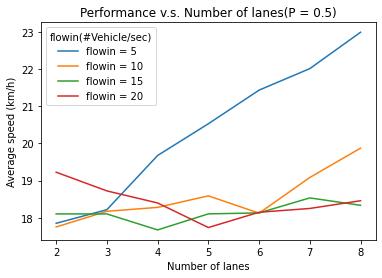

In [ ]:
#PLOT HALF ABNORMAL DRIVER
plt.plot(lanes, performance_lane5,label = 'flowin = 5')
plt.plot(lanes, performance_lane10,label = 'flowin = 10')
plt.plot(lanes, performance_lane15,label = 'flowin = 15')
plt.plot(lanes, performance_lane20,label = 'flowin = 20')
plt.title('Performance v.s. Number of lanes(P = 0.5)')
plt.xlabel('Number of lanes')
plt.ylabel('Average speed (km/h)')
#plt.axhline(y=25, color='r', linestyle='--')
plt.legend(title=('flowin(#Vehicle/sec)'))
plt.show()

In [ ]:
#Experiment: NO Abnormal Driver
lanes = [2,3,4,5,6,7,8]
#flow_ins = np.arange(5, 20, 5)
performance_lane5 = []
performance_lane10 = []
performance_lane15 = []
performance_lane20 = []

for lane in lanes:
      print("############################################")
      print("auto car ratio = {:2d}".format(lane))
      print("############################################")
      #print(speed_human_lane(lane))
      performance_lane5.append(speed_human_lane(lane,5,1))
      performance_lane10.append(speed_human_lane(lane,10,1))
      performance_lane15.append(speed_human_lane(lane,15,1))
      performance_lane20.append(speed_human_lane(lane,20,1))


############################################
auto car ratio =  2
############################################
-----------------------------------------------------------------
time = 100.00
total vehicle:   17, average speed 9.24, flow in 2.80 vehicle/s, flow out 2.46 vehicle/s
	 num cars in each lane [8. 9.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 200.00
total vehicle:   16, average speed 9.31, flow in 2.80 vehicle/s, flow out 2.82 vehicle/s
	 num cars in each lane [8. 8.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 300.00
total vehicle:   17, average speed 9.42, flow in 2.80 vehicle/s, flow out 2.78 vehicle/s
	 num cars in each lane [8. 9.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 400.00
total veh

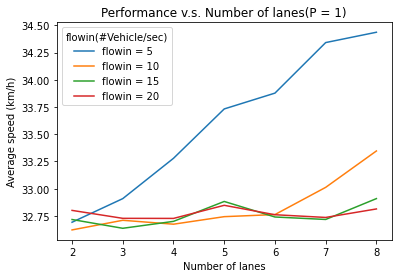

In [ ]:
#PLOT HALF ABNORMAL DRIVER
plt.plot(lanes, performance_lane5,label = 'flowin = 5')
plt.plot(lanes, performance_lane10,label = 'flowin = 10')
plt.plot(lanes, performance_lane15,label = 'flowin = 15')
plt.plot(lanes, performance_lane20,label = 'flowin = 20')
plt.title('Performance v.s. Number of lanes(P = 1)')
plt.xlabel('Number of lanes')
plt.ylabel('Average speed (km/h)')
#plt.axhline(y=25, color='r', linestyle='--')
plt.legend(title=('flowin(#Vehicle/sec)'))
plt.show()

# Experiment: 4 Ramp


In [ ]:
# Use StreetRamp
'''
    Let lane 0 be the on ramp, where the road is closed from 1/3 of the roadlength.
'''

def speed_ramp(auto, num_lane,flow_in):
    prob_auto, prob_car = auto, 0.8
    flow_in = flow_in
    # road_length = 1310
    road_length = 112.654 #0.7mile

    dt = 0.5
    prob_ramp = 0.5

    cf = CarFactory(prob_auto, prob_car)
    road = StreetRamp(num_lane, road_length, cf, prob_ramp, dt=dt)
    speed_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        speed_avg.append(np.mean([car.vel for car in road.street]))
        if i % 500 == 0:
            road.report()
#         if i % 400 == 0:
#             fig = generate_fig(road)
#             plot(fig, image='png', filename='image{:04d}.html'.format(int(i/400)), image_filename='image{:04d}'.format(int(i/400)))
    return np.mean(speed_avg)*3.6

In [ ]:
# Use StreetRamp
'''
    Let lane 0 be the on ramp, where the road is closed from 1/3 of the roadlength.
'''

def speed_flow(auto, num_lane,flow_in):
    prob_auto, prob_car = auto, 0.8
    flow_in = flow_in
    # road_length = 1310
    road_length = 112.654 #0.7mile
    dt = 0.5

    cf = CarFactory(prob_auto, prob_car)
    road = Street(num_lane, road_length, cf, dt=dt)
    speed_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        speed_avg.append(np.mean([car.vel for car in road.street]))
        if i % 500 == 0:
            road.report()
#         if i % 400 == 0:
#             fig = generate_fig(road)
#             plot(fig, image='png', filename='image{:04d}.html'.format(int(i/400)), image_filename='image{:04d}'.format(int(i/400)))
    return np.mean(speed_avg)*3.6

In [ ]:
#Experiment: Polite Driver, Different flow
np.random.seed(2)
flow_ins = np.arange(1, 21, 1)
performance_flow_ramp = []
performance_flow_ori = []


for flowin in flow_ins:
  print("############################################")
  print("flow in  = {:2d}".format(flowin))
  print("############################################")
  #print(speed_human_lane(lane))
  performance_flow_ramp.append(speed_ramp(1,1,flowin))
  performance_flow_ori.append(speed_flow(1,2,flowin))
  


############################################
flow in  =  1
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:   19, average speed 8.88, flow in 5.58 vehicle/s, flow out 5.24 vehicle/s
	 num cars in each lane [11.  8.]
-----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



-----------------------------------------------------------------
time = 250.00
total vehicle:   11, average speed 9.54, flow in 3.24 vehicle/s, flow out 3.02 vehicle/s
	 num cars in each lane [6. 5.]
-----------------------------------------------------------------
############################################
flow in  =  2
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:   17, average speed 8.79, flow in 5.58 vehicle/s, flow out 5.26 vehicle/s
	 num cars in each lane [ 7. 10.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 250.00
total vehicle:   12, average speed 9.18, flow in 4.32 vehicle/s, flow out 4.08 vehicle/s
	 num cars in each lane [8. 4.]
-----------------------------------------------------------------
############################################
flow in  =  3
##################################

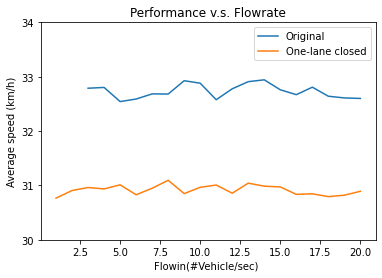

In [ ]:
#PLOT HALF ABNORMAL DRIVER
plt.plot(flow_ins, performance_flow_ori,label='Original')
plt.plot(flow_ins, performance_flow_ramp,label = "One-lane closed")


plt.title('Performance v.s. Flowrate')
plt.xlabel('Flowin(#Vehicle/sec) ')
plt.ylabel('Average speed (km/h)')
#plt.axhline(y=25, color='r', linestyle='--')
plt.yticks(np.arange(30,35,1))
plt.legend()
plt.show()

In [ ]:
#Imitial speed and ramp
from CarFactory_v import CarFactory_v as CarFactory 

def speed_v_auto_ramp(num_lane,v0,prob_au):
   # car_prob and auto_prob are independent Probability
    prob_auto, prob_car = prob_au, 0.8
    print("prob_auto=", prob_auto)
    flow_in = 10
    # road_length = 1310
    road_length = 112.654 #0.7mile

    dt = 0.5
    #prob_ramp = 0.25
    cf = CarFactory(prob_auto, prob_car, v0_car = v0)
    #road = Street(num_lane, road_length, cf,  dt=dt)
    road = StreetRamp(num_lane=1, road_length = road_length, car_factory = cf, ramp_prob=0.5, dt=dt)
    speed_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        speed = np.mean([car.vel for car in road.street])
        if np.isnan(speed): 
          speed = 0
        speed_avg.append(speed)
        if i % 500 == 0:
            road.report()
#            print(speed_avg)
#         if i % 400 == 0:
#             fig = generate_fig(road)
#             plot(fig, image='png', filename='image{:04d}.html'.format(int(i/400)), image_filename='image{:04d}'.format(int(i/400)))
    return np.mean(speed_avg) *3.6

In [ ]:
# only human car
np.random.seed(2)
v0s = np.arange(10, 40.1, 2) #kmh

performance_00 = []
performance_05 = []
performance_075 = []
performance_025 = []
performance_01 = []
for v0 in v0s:
    print("############################################")
    print("initial speed = {:2.2f}".format(v0))
    print("############################################")
    performance_00.append(speed_v_auto_ramp(1,v0,0))
    performance_05.append(speed_v_auto_ramp(1,v0,0.5))
    performance_075.append(speed_v_auto_ramp(1,v0,0.75))
    performance_025.append(speed_v_auto_ramp(1,v0,0.25))
    performance_01.append(speed_v_auto_ramp(1,v0,1.0))


############################################
initial speed = 10.00
############################################
prob_auto= 0
-----------------------------------------------------------------
time = 250.00
total vehicle:   19, average speed 2.13, flow in 1.74 vehicle/s, flow out 1.30 vehicle/s
	 num cars in each lane [10.  9.]
-----------------------------------------------------------------
prob_auto= 0.5
-----------------------------------------------------------------
time = 250.00
total vehicle:   23, average speed 2.75, flow in 1.92 vehicle/s, flow out 1.50 vehicle/s
	 num cars in each lane [12. 11.]
-----------------------------------------------------------------
prob_auto= 0.75
-----------------------------------------------------------------
time = 250.00
total vehicle:   21, average speed 2.70, flow in 2.16 vehicle/s, flow out 1.74 vehicle/s
	 num cars in each lane [11. 10.]
-----------------------------------------------------------------
prob_auto= 0.25
---------------------

In [ ]:
# only human car
np.random.seed(2)
v0s = np.arange(10, 40.1, 2) #kmh

performance_01_ori = []
performance_01_ramp = []
for v0 in v0s:
    print("############################################")
    print("initial speed = {:2.2f}".format(v0))
    print("############################################")
    
    performance_01_ori.append(speed_v_auto(2,v0,1.0))
    performance_01_ramp.append(speed_v_auto_ramp(1,v0,1.0))


############################################
initial speed = 10.00
############################################
prob_auto= 1.0
-----------------------------------------------------------------
time = 250.00
total vehicle:   22, average speed 2.69, flow in 2.30 vehicle/s, flow out 1.88 vehicle/s
	 num cars in each lane [11. 11.]
-----------------------------------------------------------------
prob_auto= 1.0
-----------------------------------------------------------------
time = 250.00
total vehicle:   23, average speed 3.18, flow in 2.24 vehicle/s, flow out 1.86 vehicle/s
	 num cars in each lane [10. 13.]
-----------------------------------------------------------------
############################################
initial speed = 12.00
############################################
prob_auto= 1.0
-----------------------------------------------------------------
time = 250.00
total vehicle:   20, average speed 3.63, flow in 2.70 vehicle/s, flow out 2.30 vehicle/s
	 num cars in each lane 

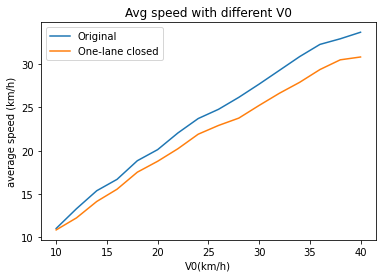

In [ ]:
# flowin = 2
# plt.plot(v0s, performance_00, label='P = 0')
# plt.plot(v0s, performance_025, label='P = 0.25')
# plt.plot(v0s, performance_05, label='P = 0.5')
# plt.plot(v0s, performance_075, label='P = 0.75')
plt.plot(v0s,performance_01_ori,label="Original")
plt.plot(v0s, performance_01_ramp,label='One-lane closed')
plt.title('Avg speed with different V0')
plt.xlabel('V0(km/h)')
plt.ylabel('average speed (km/h)')
plt.legend()

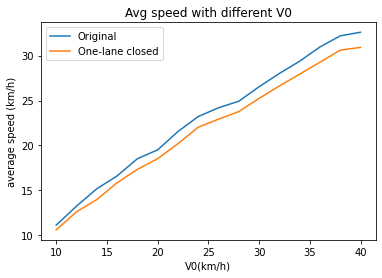

In [ ]:
# plt.plot(v0s, performance_00, label='P = 0')
# plt.plot(v0s, performance_025, label='P = 0.25')
# plt.plot(v0s, performance_05, label='P = 0.5')
# plt.plot(v0s, performance_075, label='P = 0.75')
plt.plot(v0s,performance_01_ori,label="Original")
plt.plot(v0s, performance_01_ramp,label='One-lane closed')
plt.title('Avg speed with different V0')
plt.xlabel('V0(km/h)')
plt.ylabel('average speed (km/h)')
plt.legend()

In [ ]:
from CarFactory_v import CarFactory_v as CarFactory

def calculation_v_d_f_Ramp(num_lane,v0,prob_auto):
    # return avg v , d, f
   # car_prob and auto_prob are independent Probability
    prob_auto, prob_car = prob_auto, 0.8
    flow_in = 2
    # road_length = 1310
    road_length = 112.654 #0.7mile

    dt = 0.5
    prob_ramp = 0.25
    cf = CarFactory(prob_auto, prob_car, v0_car = v0)
    road = StreetRamp(num_lane, road_length, cf, prob_ramp, dt=dt)
    speed_avg = []
    flow_avg = []
    density_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        numofcar = 0
        for car in road.street:
          numofcar += 1 #Get the number of car 
        #print(numofcar)

        speed = np.mean([car.vel for car in road.street]) * 3.6 #km/s
        density = numofcar / (road_length / 100) # #v/km
        flow = speed * density # #v/s
        if np.isnan(speed): 
          speed = 0
        if np.isnan(density): 
          density = 0
        if np.isnan(flow): 
          flow = 0
        speed_avg.append(speed)
        flow_avg.append(flow)
        density_avg.append(density)
       
        if i % 500 == 0:
            road.report()
#            print(speed_avg)
#         if i % 400 == 0:
#             fig = generate_fig(road)
#             plot(fig, image='png', filename='image{:04d}.html'.format(int(i/400)), image_filename='image{:04d}'.format(int(i/400)))
    return np.mean(speed_avg),np.mean(density_avg),np.mean(flow_avg)

In [ ]:
# Ratio of Polite driver to Density, flow with Ramp condition
np.random.seed(2)
v0s = np.arange(10, 40.1, 2) #kmh
performance_density_0 = []
performance_flow_0 = []
performance_speed_0 = []

performance_density_025 = []
performance_flow_025 = []
performance_speed_025 = []

performance_density_05 = []
performance_flow_05 = []
performance_speed_05 = []

performance_density_075 = []
performance_flow_075 = []
performance_speed_075 = []

performance_density_1 = []
performance_flow_1 = []
performance_speed_1 = []

performance = []
for v0 in v0s:
    print("############################################")
    print("initial speed = {:2.2f}".format(v0))
    print("############################################")

    speed0, density0, flow0 = calculation_v_d_f(1,v0,0) #abnormal
    speed025, density025, flow025 = calculation_v_d_f(1,v0,0.25)
    speed05, density05, flow05 = calculation_v_d_f(1,v0,0.5)
    speed075, density075, flow075 = calculation_v_d_f(1,v0,0.75)
    speed1, density1, flow1 = calculation_v_d_f(1,v0,1) #normal


    performance_density_0.append(density0)
    performance_density_025.append(density025)
    performance_density_05.append(density05)
    performance_density_075.append(density075)
    performance_density_1.append(density1)

    performance_flow_0.append(flow0)
    performance_flow_025.append(flow025)
    performance_flow_05.append(flow05)
    performance_flow_075.append(flow075)
    performance_flow_1.append(flow1)

    performance_speed_0.append(speed0)
    performance_speed_025.append(speed025)
    performance_speed_05.append(speed05)
    performance_speed_075.append(speed075)
    performance_speed_1.append(speed1)




############################################
initial speed = 10.00
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:   12, average speed 2.48, flow in 0.86 vehicle/s, flow out 0.66 vehicle/s
	 num cars in each lane [12.]
-----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



-----------------------------------------------------------------
time = 250.00
total vehicle:   11, average speed 2.76, flow in 0.94 vehicle/s, flow out 0.72 vehicle/s
	 num cars in each lane [11.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 250.00
total vehicle:   12, average speed 2.91, flow in 0.92 vehicle/s, flow out 0.70 vehicle/s
	 num cars in each lane [12.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 250.00
total vehicle:   11, average speed 2.51, flow in 1.14 vehicle/s, flow out 0.92 vehicle/s
	 num cars in each lane [11.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 250.00
total vehicle:   11, average speed 3.11, flow in 1.26 vehicle/s, flow out 1.08 vehicle/s
	 num cars in each lane [11.]
------

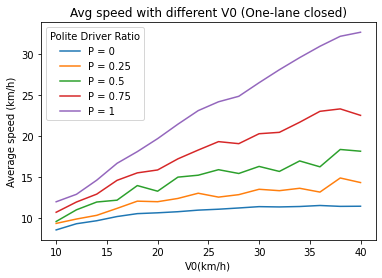

In [ ]:
plt.plot(v0s, performance_speed_0, label='P = 0')
plt.plot(v0s, performance_speed_025, label='P = 0.25')
plt.plot(v0s, performance_speed_05, label='P = 0.5')
plt.plot(v0s, performance_speed_075, label='P = 0.75')
plt.plot(v0s, performance_speed_1, label='P = 1')
plt.title('Avg speed with different V0 (One-lane closed)')
plt.xlabel('V0(km/h)')
plt.ylabel('Average speed (km/h)')
plt.legend(title = "Polite Driver Ratio")

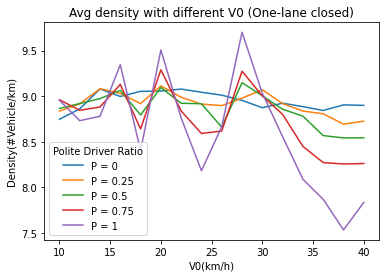

In [ ]:
plt.plot(v0s, performance_density_0, label='P = 0')
plt.plot(v0s, performance_density_025, label='P = 0.25')
plt.plot(v0s, performance_density_05, label='P = 0.5')
plt.plot(v0s, performance_density_075, label='P = 0.75')
plt.plot(v0s, performance_density_1, label='P = 1')
plt.title('Avg density with different V0 (One-lane closed)')
plt.xlabel('V0(km/h)')
plt.ylabel('Density(#Vehicle/km)')
plt.legend(title = "Polite Driver Ratio")

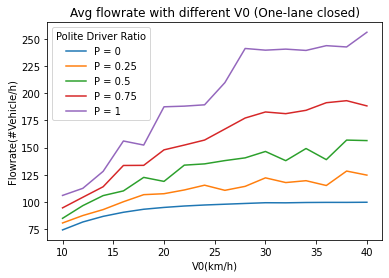

In [ ]:
plt.plot(v0s, performance_flow_0, label='P = 0')
plt.plot(v0s, performance_flow_025, label='P = 0.25')
plt.plot(v0s, performance_flow_05, label='P = 0.5')
plt.plot(v0s, performance_flow_075, label='P = 0.75')
plt.plot(v0s, performance_flow_1, label='P = 1')
plt.title('Avg flowrate with different V0 (One-lane closed)')
plt.xlabel('V0(km/h)')
plt.ylabel('Flowrate(#Vehicle/h)')
plt.legend(title = "Polite Driver Ratio")